### Importing Relevant Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the dataset

In [2]:
titanic = pd.read_csv('../input/titanic-dataset/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Finding the number of rows and columns of the data
titanic.shape

(891, 12)

There are 891 rows and 12 columns in the dataset

In [4]:
#Finding the name and datatypes of the columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data thus gives information about the Passenger ID, that passenger Survived or not, class in which passenger was travelling, Name of the Passenger, Gender and Age of the passenger, family relation of the passenger in terms of sibling/spouse and parent/child, ticket number, ticket fare, Cabin number and the port of embarkation of the passenger. We are going to discuss each of these columns as variables in which Survived column, is the target variable here which is to be predicted from the other variables. Also, 7 of the variables are numerical and the others are object.

### Handling the missing values
We got to know that this dataset contains missing values. These variables have missing values-
1. Age
2. Cabin
3. Embarked

In [5]:
#Analyzing the Age Variable for missing value imputaion
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
#Since mean age is 29, imputing the missing values of Age as 29
titanic.Age.fillna(29, inplace=True)
#Checking whether the null values are replaced
titanic.Age.isnull().values.sum()

0

In [7]:
#Handling the Cabin Variable
#The datatype is object, so finding the unique values
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
#Since there are a lot of unique values in the Cabin but it is noticeable that the first letter of the object varies from 'A' to 'G'
#We can extract the first value only to get a categorical data which might be a good predictor.
#Creating a new column Cabin_Code for this
titanic['Cabin_Code'] = titanic['Cabin'].astype(str).str[0]
titanic.Cabin_Code.unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

(array([687.,  59.,  32.,   4.,   0.,  33.,  15.,  47.,  13.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

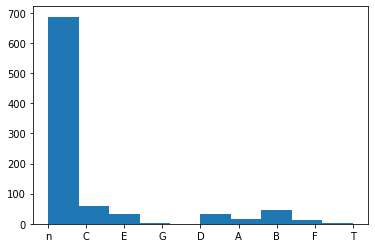

In [9]:
#Projecting the values with respect to the target variable to see which cabin gives the highest/lowest survival rate
plt.hist(titanic.Cabin_Code)

In [10]:
#removing the Cabin_Code Variable because of a lot of null values.
titanic.drop('Cabin_Code', axis=1, inplace=True)


In [11]:
titanic.drop('Cabin', axis=1, inplace=True)

In [12]:
#The Embarked Column
#There are two rows in which there are missing values, thus removing those rows
titanic.dropna(inplace=True)

In [13]:
titanic.shape

(889, 11)

Missing values successfully removed. Our dataframe has now no missing values

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Train Test Split

In [15]:
#Importing
from sklearn.model_selection import train_test_split
#Splitting the dataset into two parts, train and test
train_data, test_data = train_test_split(titanic, random_state = 100,test_size=0.2)

In [16]:
train_data.shape

(711, 11)

In [17]:
test_data.shape

(178, 11)

#### Train test split successfully done

### Data Cleaning

By visual analysis, it may be considered that the Passenger ID, Passenger Name, and Ticket Number has no role in predicting the desired output. We can thus exclude these columns from the dataset

In [18]:
train_data.drop('PassengerId', axis = 1, inplace=True)
train_data.drop('Ticket', axis = 1, inplace=True)
train_data.drop('Name', axis = 1, inplace=True)
#test_data.drop('PassengerId', axis = 1, inplace=True)
#test_data.drop('Name', axis = 1, inplace=True)
#test_data.drop('Ticket', axis = 1, inplace=True)


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 777 to 521
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  711 non-null    int64  
 1   Pclass    711 non-null    int64  
 2   Sex       711 non-null    object 
 3   Age       711 non-null    float64
 4   SibSp     711 non-null    int64  
 5   Parch     711 non-null    int64  
 6   Fare      711 non-null    float64
 7   Embarked  711 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.0+ KB


## Explanatory Data Analysis

### 1.Survived, the target variable

count    711.000000
mean       0.388186
std        0.487680
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


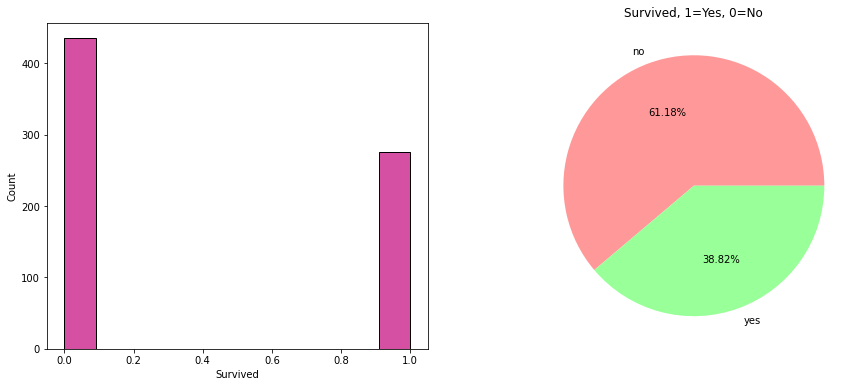

In [20]:
print(train_data.Survived.describe())
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=train_data.Survived, color='mediumvioletred')
plt.subplot(1,2,2)
plt.pie(x=train_data.Survived.value_counts(),labels =['no','yes'],autopct='%1.2f%%',colors = ['#ff9999','#99ff99'])
plt.title('Survived, 1=Yes, 0=No')
plt.show()

Inference: 61% of the people survived  and 38% did not survive.

### 2.Passenger Class Variable (Pclass)

In [21]:
train_data.Pclass.unique()

array([3, 1, 2])

count    711.000000
mean       2.286920
std        0.845425
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


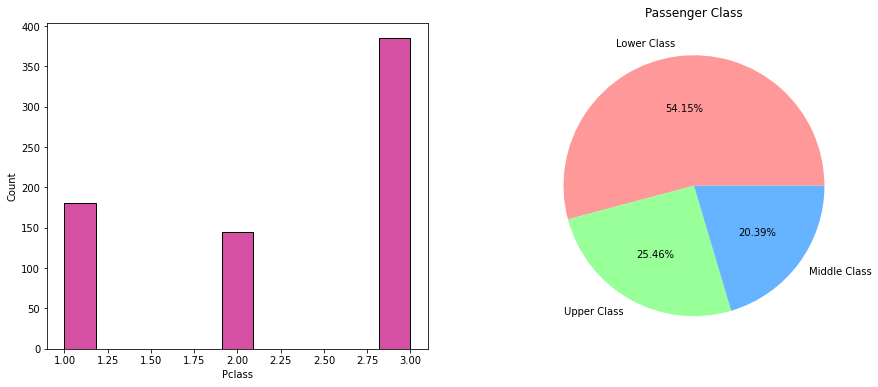

In [22]:
print(train_data.Pclass.describe())
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=train_data.Pclass, color='mediumvioletred')
plt.subplot(1,2,2)
plt.pie(x=train_data.Pclass.value_counts(),labels =['Lower Class','Upper Class','Middle Class'],autopct='%1.2f%%',colors = ['#ff9999','#99ff99','#66b3ff'])
plt.title('Passenger Class')
plt.show()

There are three passenger Classes: 1,2,3. Upper Middle and Lower according to the socio-economic status. We can see that more than half of the passengers (55%) belong to the lower class, then comes the Upper Class (24%) and then the Middle Class (21%)

In [23]:
#Passenger Class Analysis with respect to the Target Variable
#Count of survivors by class
table = pd.crosstab(train_data['Survived'],train_data['Pclass'])
print(table)

Pclass      1   2    3
Survived              
0          66  76  293
1         115  69   92


In [24]:
#Proportion of survivors by class
print(train_data.groupby('Pclass').Survived.mean())

Pclass
1    0.635359
2    0.475862
3    0.238961
Name: Survived, dtype: float64


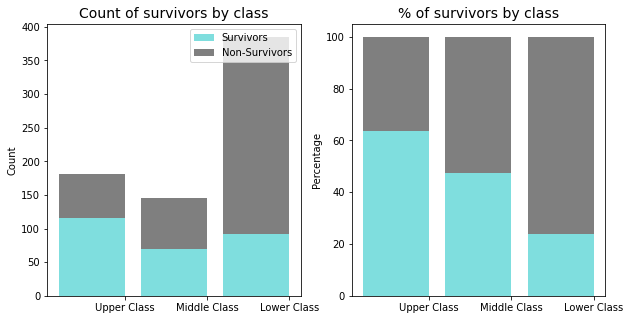

In [25]:
#Visualistaion of the Fare Variable with respect to the target variable

# calculate values for each survival status
survivors_data = train_data[train_data.Survived==True]
non_survivors_data = train_data[train_data.Survived==False]
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['Upper Class','Middle Class','Lower Class' ]


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='c')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='k')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='c')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='k')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)
plt.show()

#### Inference:
The graphs above show that whilst the lower class had more passengers, than all classes, and more survivors than the middle class, the lower class had the lowest survival rate. The Upper Class passengers had the highest survival rate

### 3.The Fare Variable.

count    711.000000
mean      33.018149
std       50.097410
min        0.000000
25%        7.925000
50%       14.500000
75%       31.331250
max      512.329200
Name: Fare, dtype: float64


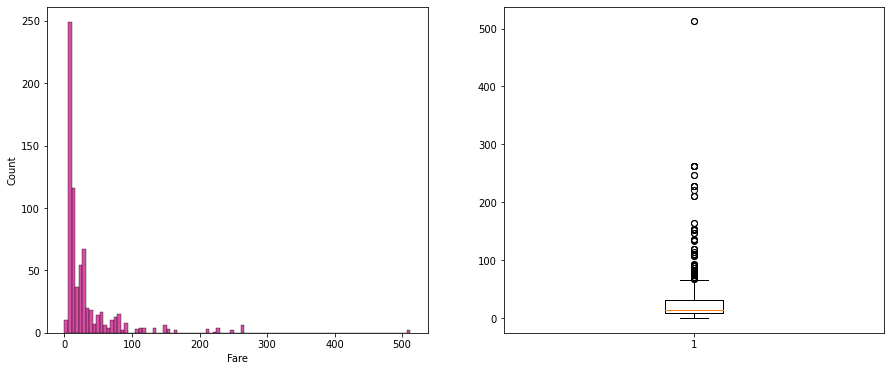

In [26]:
#Visualising the Fare Variable which is a continuous variable
print(train_data.Fare.describe())
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=train_data.Fare, color='mediumvioletred')
plt.subplot(1,2,2)
plt.boxplot(train_data.Fare)
plt.show()

The Fare Variable shows the ticket fare in USD. The most expensive ticket was sold for 512 USD. The minimum value is zero, which may be showing the crew members who are alloted a cabin but were not charged the ticket fare. The mean value is 32 and median value is 14. We can handle the zero values with the median value. Mean value is not used since there are outliers which could have hightened the mean value. Thus doing the same.

In [27]:
#First converting the zero values into NaN
train_data['Fare'] = train_data.Fare.replace(0,np.NaN) 

In [28]:
train_data['Fare'].isnull().sum()

9

In [29]:
#Imputing the NaN Values with the median value
train_data.Fare.fillna(test_data.Age.median(),inplace=True)

In [30]:
train_data['Fare'].isnull().sum()

0

#### There can be an interdependence between PClass and Fare. Plotting the same

<AxesSubplot:xlabel='Fare', ylabel='Count'>

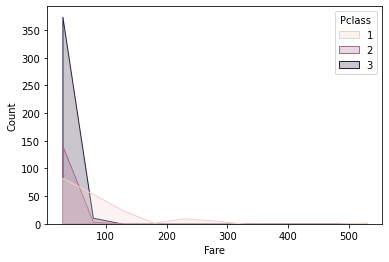

In [31]:
sns.histplot(data=train_data, x='Fare', hue='Pclass',binwidth=50, element="poly")

This can be inferred that Passenger Class 1 has bought the costliest as well as cheap tickets. Both Passenger Class 2 and 3 have bought the cheap tickets. However, no interdependence of both variables on each other is evident.

###  4. Sex Variable

count      711
unique       2
top       male
freq       460
Name: Sex, dtype: object


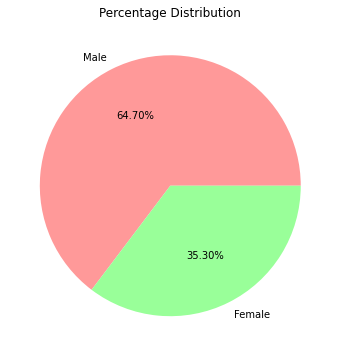

In [32]:
print(train_data.Sex.describe())
plt.figure(figsize=(15, 6))
plt.pie(x=train_data.Sex.value_counts(),labels =['Male','Female'],autopct='%1.2f%%',colors = ['#ff9999','#99ff99'])
plt.title('Percentage Distribution')
plt.show()

In [33]:
#Count of Survivors by Gender
table = pd.crosstab(train_data['Survived'],train_data['Sex'])
print(table)

Sex       female  male
Survived              
0             65   370
1            186    90


In [34]:
#Proportion of survivors by Gender
print(train_data.groupby('Sex').Survived.mean())

Sex
female    0.741036
male      0.195652
Name: Survived, dtype: float64


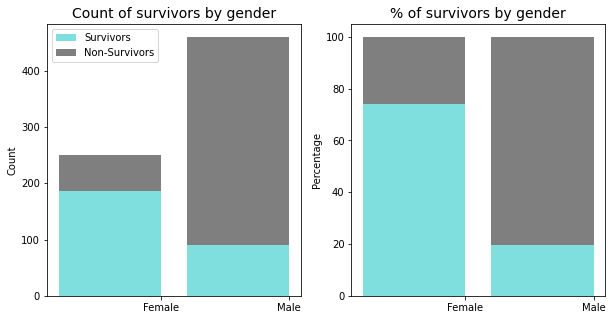

In [35]:
# calculate values for each survival status
survivors_gender = survivors_data.groupby(['Sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

# calculate totals for percentates
totals = survivors_gender + non_survivors_gender

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=0.5, color='c')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.5, color='k')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='c')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='k')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)
plt.show()

Inference: There are 65% males and 35% females. Most of the males lost their lives while most of the females survived.
Females had a higher proportion (74.2%) of survivors compared to the proportion of males (18.9%). This shows that females had a greater rate of survival.

### 5. Visualising the Age Variable.

count    711.000000
mean      29.794895
std       13.332687
min        0.420000
25%       22.000000
50%       29.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


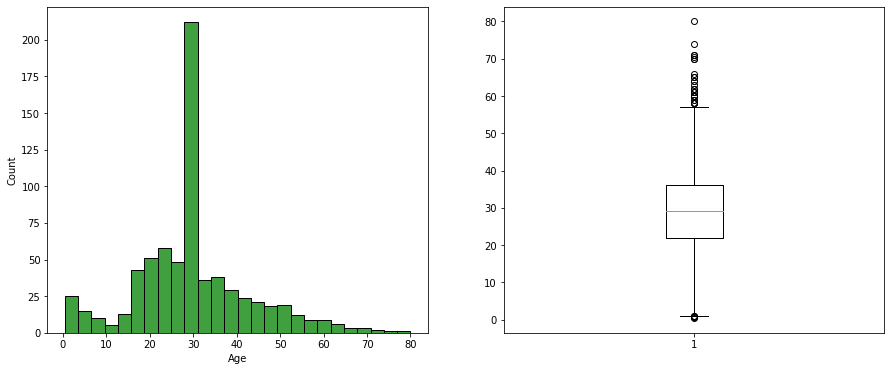

In [36]:
print(train_data.Age.describe())
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=train_data.Age, color='green')
plt.subplot(1,2,2)
plt.boxplot(train_data.Age)
plt.show()

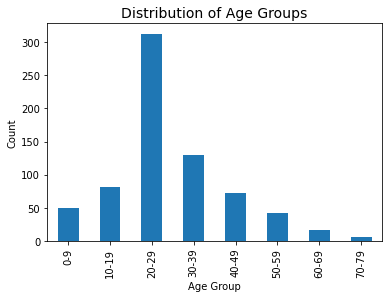

In [37]:
#Binning the age groups
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
train_data['age_group'] = pd.cut(train_data.Age, range(0, 81, 10), right=False, labels=age_labels)
train_data.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

Inference: From the plot above we can see that the majority of passengers were aged between 20-29

In [38]:
#Proportion of survivors by age group
print(train_data.groupby(['age_group']).Survived.mean())

age_group
0-9      0.600000
10-19    0.370370
20-29    0.335463
30-39    0.434109
40-49    0.424658
50-59    0.452381
60-69    0.250000
70-79    0.000000
Name: Survived, dtype: float64


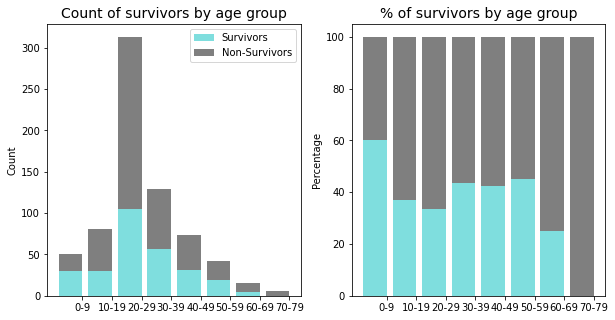

In [39]:
#Visualizing Age Groups with Respect to Survival


# calculate values for each survival status
survivors_data['age_group'] = pd.cut(train_data.Age, range(0, 81, 10), right=False, labels=age_labels)
non_survivors_data['age_group'] = pd.cut(train_data.Age, range(0, 81, 10), right=False, labels=age_labels)
survivors_age_group = survivors_data.groupby(['age_group']).size().values
non_survivors_age_group = non_survivors_data.groupby(['age_group']).size().values

# calculate totals for percentates
totals = survivors_age_group + non_survivors_age_group

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_age_group, totals)*100 
data2_percentages = calculate_percentage(non_survivors_age_group, totals)*100 


tick_spacing = np.array(range(len(age_labels)))+0.4


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_age_group)), survivors_age_group, label='Survivors', alpha=0.5, color='c')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Non-Survivors', alpha=0.5, color='k')
plt.sca(ax1)
plt.xticks(tick_spacing, age_labels )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='c')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='k')
plt.sca(ax2)
plt.xticks(tick_spacing,  age_labels)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by age group",fontsize=14)
plt.show()

Inference: When looking at proportions and percentages of survivors per age group, it shows that there was similar proportion of survival for all age groups except for the last age group of 70-79 where none of the passengers survived. Consideration of the gender of the passengers as well in this analysis is required.

In [40]:
#Proportion of Survivors by age group as well as gender
print(train_data.groupby(['Sex','age_group']).Survived.mean())

Sex     age_group
female  0-9          0.636364
        10-19        0.714286
        20-29        0.690000
        30-39        0.847826
        40-49        0.724138
        50-59        0.941176
        60-69        1.000000
        70-79             NaN
male    0-9          0.571429
        10-19        0.108696
        20-29        0.169014
        30-39        0.204819
        40-49        0.227273
        50-59        0.120000
        60-69        0.142857
        70-79        0.000000
Name: Survived, dtype: float64


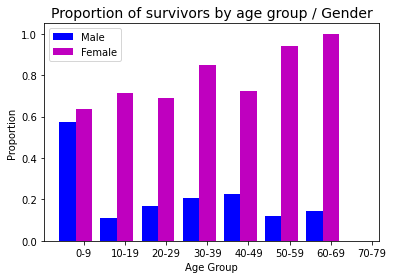

In [41]:
#Visualizing
male_data = train_data[train_data.Sex == "male"].groupby('age_group').Survived.mean().values
female_data = train_data[train_data.Sex == "female"].groupby('age_group').Survived.mean().values
ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='m')
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

Inference: After relooking at the proportion of survivors by age group and gender, the data supports notion of women and children to be given preferential treatment over men. The plot "Proportion of survivors by age group / gender", shows that children (0-9 years old, male and female) and women (all ages) had a much higher proportion of survivors. This supports the notion of the seats in the lifeboats been given to Women and Children first.

### 6. The Embarked Variable

This variable gives the name of the port of Embarkation of the speific passenger.

In [42]:
train_data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

S stands for Southampton
C stands for Chebourg
Q stands for Queenstown

Thus mapping the same

In [43]:
def map_data(df):
    #Function which takes the original dataframe and returns a clean / updated dataframe
    port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
    df['Embarked'] = df['Embarked'].map(port_map)
    
    return df

train_data = map_data(train_data)

#Checking
train_data.Embarked.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

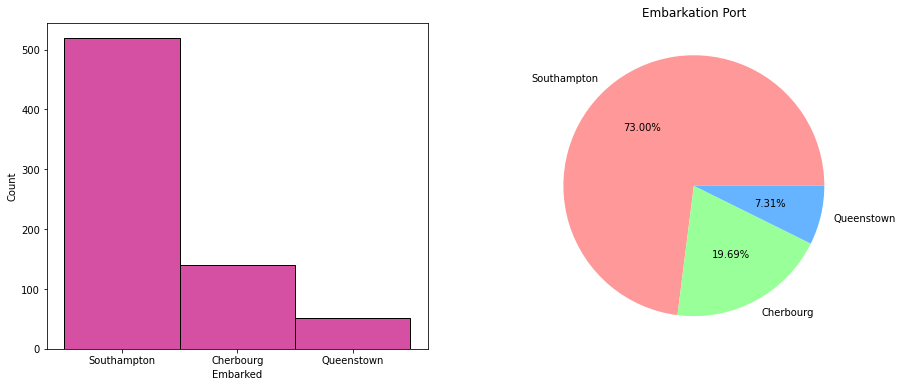

In [44]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=train_data.Embarked, color='mediumvioletred')
plt.subplot(1,2,2)
plt.pie(x=train_data.Embarked.value_counts(),labels =train_data.Embarked.unique(),autopct='%1.2f%%',colors = ['#ff9999','#99ff99','#66b3ff'])
plt.title('Embarkation Port')
plt.show()

In [45]:
#Count of Survivors by Embarked
table = pd.crosstab(train_data['Survived'],train_data['Embarked'])
print(table)

Embarked  Cherbourg  Queenstown  Southampton
Survived                                    
0                65          34          336
1                75          18          183


In [46]:
#Proportion of survivors by Embarked
print(train_data.groupby(['Embarked']).Survived.mean())

Embarked
Cherbourg      0.535714
Queenstown     0.346154
Southampton    0.352601
Name: Survived, dtype: float64


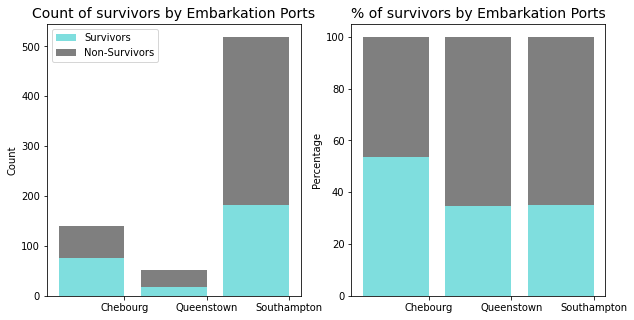

In [47]:
# calculate values for each survival status
survivors_Emb = survivors_data.groupby(['Embarked']).size().values
non_survivors_Emb = non_survivors_data.groupby(['Embarked']).size().values

# calculate totals for percentates
totals = survivors_Emb + non_survivors_Emb

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_Emb, totals)*100 
data2_percentages = calculate_percentage(non_survivors_Emb, totals)*100 

Emb_categories = ['Chebourg','Queenstown','Southampton']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_Emb)), survivors_Emb, label='Survivors', alpha=0.5, color='c')
ax1.bar(range(len(non_survivors_Emb)), non_survivors_Emb, bottom=survivors_Emb, label='Non-Survivors', alpha=0.5, color='k')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], Emb_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by Embarkation Ports",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='c')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='k')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  Emb_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by Embarkation Ports",fontsize=14)
plt.show()

Inference: Most of the passengers embarked from the Southampton port, thus most of the survivors and non survivors embarked from the same port. The important inference is that, the more than 50% of the passengers who boarded from the Vhebourg port, survived which is the highest perentage of survival among all the ports.

### 7. The SibSp Variable

In [48]:
train_data.SibSp.describe()

count    711.0000
mean       0.5218
std        1.1002
min        0.0000
25%        0.0000
50%        0.0000
75%        1.0000
max        8.0000
Name: SibSp, dtype: float64

In [49]:
train_data.SibSp.unique()

array([0, 1, 2, 5, 4, 3, 8])

This variable gives information about the number of Siblings and Spouse for a particular passenger. This field contains integer values ranging from 0 to 8

In [50]:
#Count of Survivors by SibSp
table = pd.crosstab(train_data['Survived'],train_data['SibSp'])
print(table)

SibSp       0   1   2   3   4  5  8
Survived                           
0         316  76  11  10  12  5  5
1         171  90   8   4   3  0  0


In [51]:
#Proportion of survivors by SibSp
print(train_data.groupby(['SibSp']).Survived.mean())

SibSp
0    0.351129
1    0.542169
2    0.421053
3    0.285714
4    0.200000
5    0.000000
8    0.000000
Name: Survived, dtype: float64


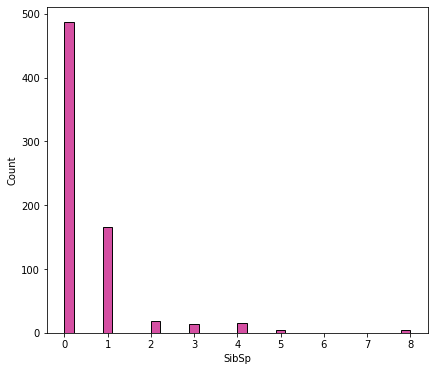

In [52]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=train_data.SibSp, color='mediumvioletred')
plt.show()

### 8. The ParCh Variable

In [53]:
train_data.Parch.describe()

count    711.000000
mean       0.383966
std        0.799804
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [54]:
train_data.SibSp.unique()

array([0, 1, 2, 5, 4, 3, 8])

This variable gives information about the number of Parents and Children for a particular passenger. This field contains integer values ranging from 0 to 8

In [55]:
#Count of Survivors by Parch
table = pd.crosstab(train_data['Survived'],train_data['Parch'])
print(table)

Parch       0   1   2  3  4  5  6
Survived                         
0         354  40  33  2  3  2  1
1         186  52  35  2  0  1  0


In [56]:
#Proportion of survivors by Parch
print(train_data.groupby(['Parch']).Survived.mean())

Parch
0    0.344444
1    0.565217
2    0.514706
3    0.500000
4    0.000000
5    0.333333
6    0.000000
Name: Survived, dtype: float64


### Adding a Family Size column so as to compare the size of families with the number of survivors.

In [57]:
# add new column (FamilySize) to dataframe - sum of SibSp and Parch
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

In [58]:
train_data.FamilySize.describe()

count    711.000000
mean       0.905767
std        1.613624
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: FamilySize, dtype: float64

In [59]:
train_data.FamilySize.unique()

array([ 0,  2,  1,  7,  6,  5,  4,  3, 10])

In [60]:
#Count of Survivors by FamilySize
table = pd.crosstab(train_data['Survived'],train_data['FamilySize'])
print(table)

FamilySize   0   1   2   3   4   5   6   7   10
Survived                                       
0           299  56  31   8   9  15   6   6   5
1           129  76  45  17   3   2   4   0   0


In [61]:
#Proportion of survivors by FamilySize
print(train_data.groupby(['FamilySize']).Survived.mean())

FamilySize
0     0.301402
1     0.575758
2     0.592105
3     0.680000
4     0.250000
5     0.117647
6     0.400000
7     0.000000
10    0.000000
Name: Survived, dtype: float64


#### Dropping the SibSp and Parch Variables from the dataset and including only FamilySize Variable 

In [62]:
train_data.drop(['SibSp'], axis=1,inplace=True)
train_data.drop(['Parch'], axis=1,inplace=True)
#test_data.drop(['SibSp'], axis=1,inplace=True)
#test_data.drop(['Parch'], axis=1,inplace=True)

#Droppping the Age Group Variable as it is no longer needed
train_data.drop(['age_group'], axis=1,inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
777,1,3,female,5.0,12.475,Southampton,0
782,0,1,male,29.0,30.000,Southampton,0
708,1,1,female,22.0,151.550,Southampton,0
153,0,3,male,40.5,14.500,Southampton,2
563,0,3,male,29.0,8.050,Southampton,0


### Label Encoding the Sex Variable

In [63]:
#For the Sex Column, using Label Encoder
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
train_data['Sex Encoded'] = le.fit_transform(train_data.Sex)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Sex Encoded
777,1,3,female,5.0,12.475,Southampton,0,0
782,0,1,male,29.0,30.000,Southampton,0,1
708,1,1,female,22.0,151.550,Southampton,0,0
153,0,3,male,40.5,14.500,Southampton,2,1
563,0,3,male,29.0,8.050,Southampton,0,1


#### Male is Encoded as 1 and female as 0

### One Hot Encoding of the Embarked Column

In [64]:
#Using pd.get_dummies to create dummy variables for one hot encoding
temp = pd.get_dummies(train_data['Embarked'])
train_data = pd.concat([train_data, temp], axis = 1)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Sex Encoded,Cherbourg,Queenstown,Southampton
777,1,3,female,5.0,12.475,Southampton,0,0,0,0,1
782,0,1,male,29.0,30.000,Southampton,0,1,0,0,1
708,1,1,female,22.0,151.550,Southampton,0,0,0,0,1
153,0,3,male,40.5,14.500,Southampton,2,1,0,0,1
563,0,3,male,29.0,8.050,Southampton,0,1,0,0,1


In [65]:
#To remove multicollinearity, removing one of the newly created column Cherbourg
train_data.drop(['Cherbourg'], axis=1,inplace=True)

### One Hot Encoding of the PClass Column

In [66]:
#Using pd.get_dummies to create dummy variables for one hot encoding
temp = pd.get_dummies(train_data['Pclass'])
train_data = pd.concat([train_data, temp], axis = 1)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Sex Encoded,Queenstown,Southampton,1,2,3
777,1,3,female,5.0,12.475,Southampton,0,0,0,1,0,0,1
782,0,1,male,29.0,30.000,Southampton,0,1,0,1,1,0,0
708,1,1,female,22.0,151.550,Southampton,0,0,0,1,1,0,0
153,0,3,male,40.5,14.500,Southampton,2,1,0,1,0,0,1
563,0,3,male,29.0,8.050,Southampton,0,1,0,1,0,0,1


In [67]:
#Renaming the Column Names
train_data  = train_data.rename(columns={1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'})
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Sex Encoded,Queenstown,Southampton,Upper Class,Middle Class,Lower Class
777,1,3,female,5.0,12.475,Southampton,0,0,0,1,0,0,1
782,0,1,male,29.0,30.000,Southampton,0,1,0,1,1,0,0
708,1,1,female,22.0,151.550,Southampton,0,0,0,1,1,0,0
153,0,3,male,40.5,14.500,Southampton,2,1,0,1,0,0,1
563,0,3,male,29.0,8.050,Southampton,0,1,0,1,0,0,1


In [68]:
#To remove multicollinearity, removing one of the newly created column Middle Class
train_data.drop(['Middle Class'], axis=1,inplace=True)

In [69]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Sex Encoded,Queenstown,Southampton,Upper Class,Lower Class
777,1,3,female,5.0,12.475,Southampton,0,0,0,1,0,1
782,0,1,male,29.0,30.000,Southampton,0,1,0,1,1,0
708,1,1,female,22.0,151.550,Southampton,0,0,0,1,1,0
153,0,3,male,40.5,14.500,Southampton,2,1,0,1,0,1
563,0,3,male,29.0,8.050,Southampton,0,1,0,1,0,1


In [70]:
#Removing the extra columns for final model building
train_data.drop(['Pclass'], axis=1,inplace=True)
train_data.drop(['Sex'], axis=1,inplace=True)
train_data.drop(['Embarked'], axis=1,inplace=True)

### Pairplots to check Interdependence among the Variables

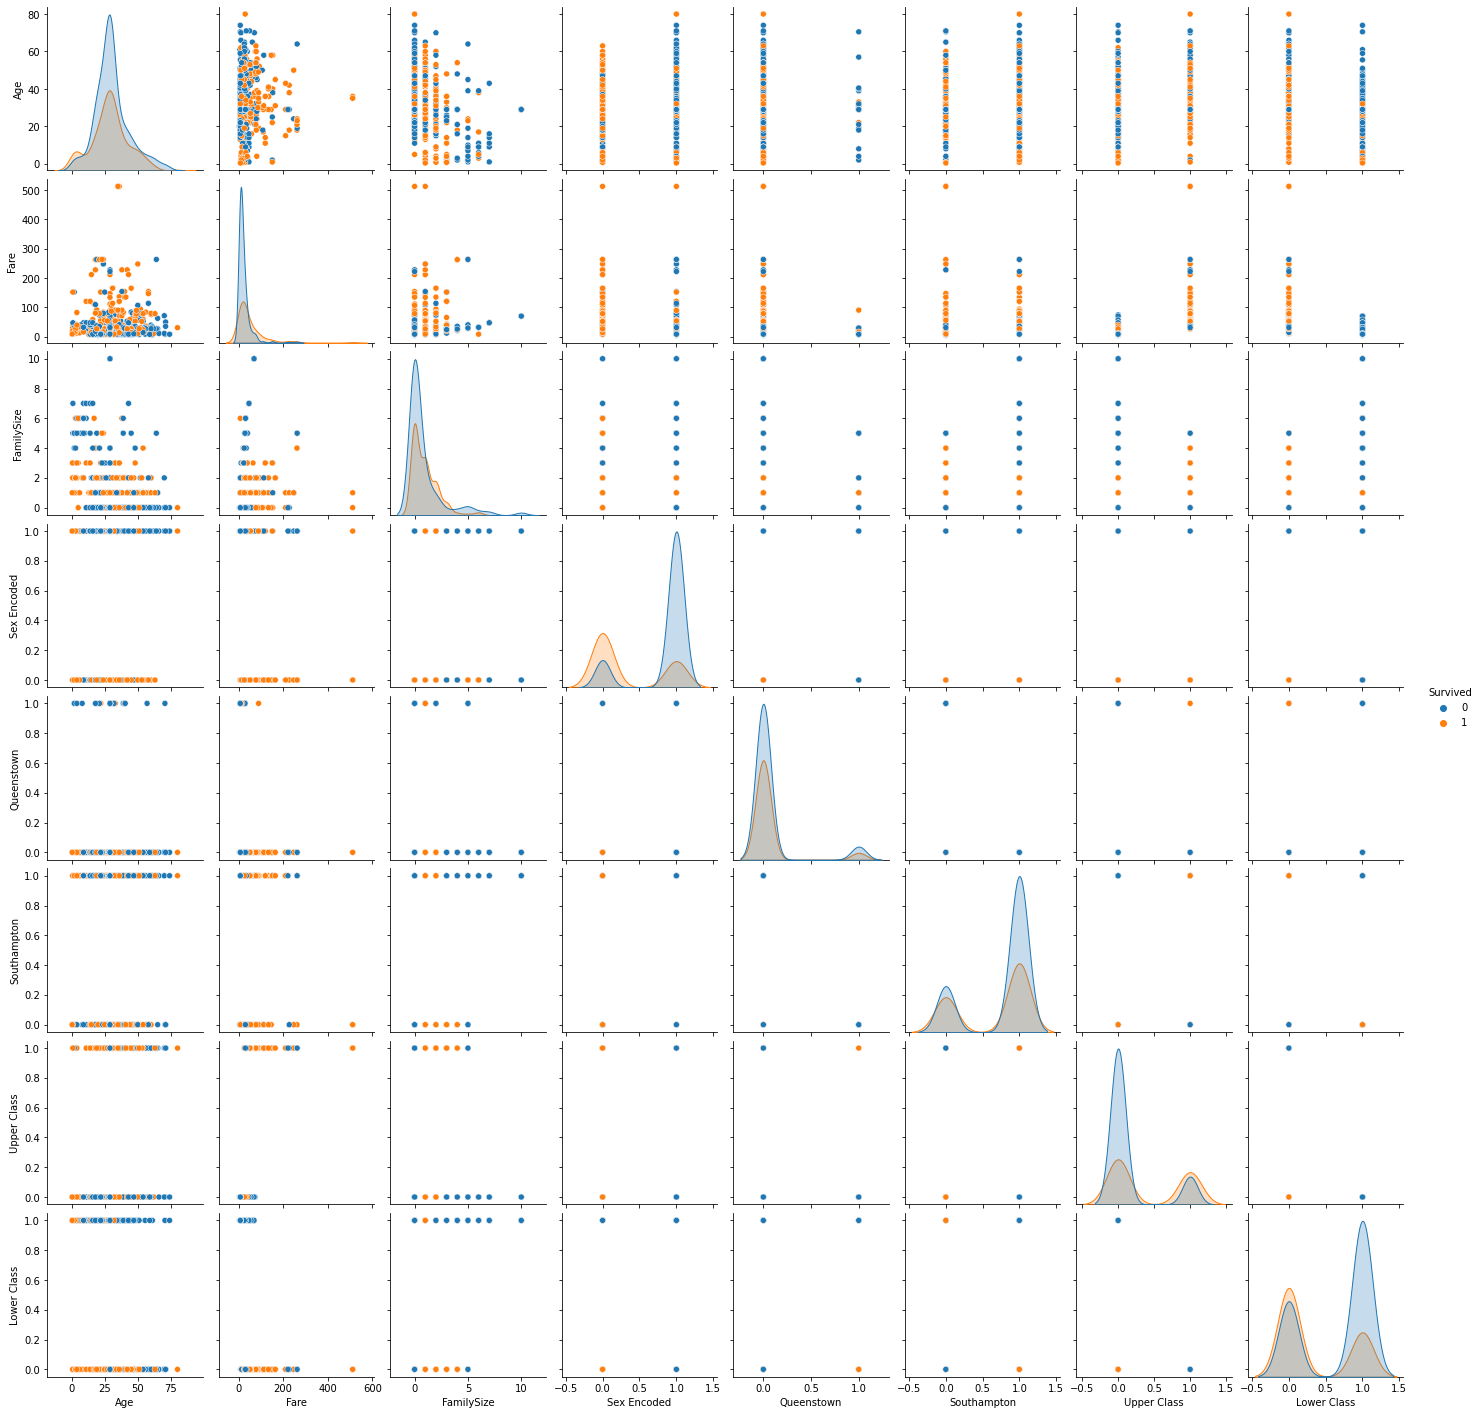

In [71]:
sns.pairplot(train_data, hue = 'Survived')
plt.show()

### Correlation Heatmaps

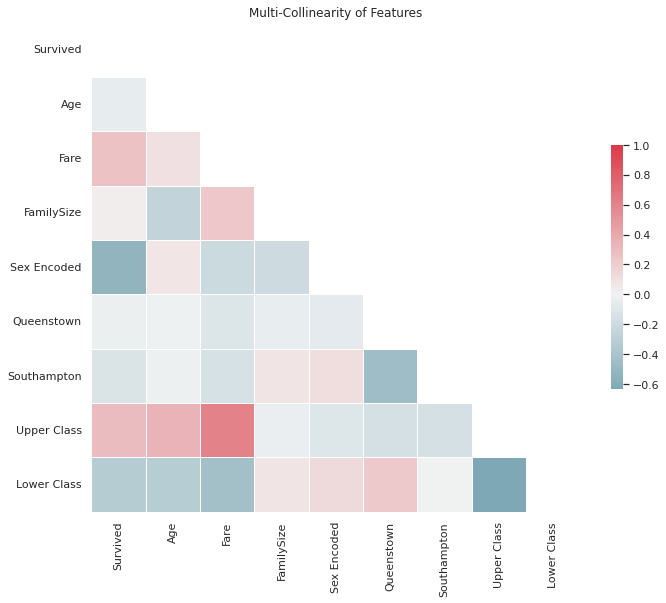

In [72]:
sns.set(style="whitegrid")
# Create a covariance matrix
corr = train_data.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')
plt.show()

#### Separating Input Variables and Output Variables of the Training Data

In [73]:
train_y = pd.DataFrame(train_data.Survived)
train_y.head()

,Survived
777,1
782,0
708,1
153,0
563,0


In [74]:
train_x = train_data.drop(['Survived'], axis=1)
train_x.head()

,Age,Fare,FamilySize,Sex Encoded,Queenstown,Southampton,Upper Class,Lower Class
777,5.0,12.475,0,0,0,1,0,1
782,29.0,30.000,0,1,0,1,1,0
708,22.0,151.550,0,0,0,1,1,0
153,40.5,14.500,2,1,0,1,0,1
563,29.0,8.050,0,1,0,1,0,1


### Training Decision Tree Algorithm for Classification

In [75]:
#Importing Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Creating the classifier object using Gini Impurity as criterion
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

# Performing training
clf_gini.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [76]:
# Creating the classifier object using Entropy as criterion
clf_ent = DecisionTreeClassifier(criterion = "entropy",
            random_state = 100,max_depth=3, min_samples_leaf=5)

# Performing training

clf_ent.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

### Training Random Forest Algorithm for Classification

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(n_estimators=200)
clf_rfc.fit(train_x, train_y)

RandomForestClassifier(n_estimators=200)

### Preparing the test dataset for making prediction after Model has been built

In [78]:
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
639,640,0,3,"Thorneycroft, Mr. Percival",male,29.0,1,0,376564,16.1000,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,Q
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,C
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.0,1,1,2661,15.2458,C


In [79]:
#Dropping the ID, Name and Ticket column
test_data.drop('PassengerId', axis = 1, inplace=True)
test_data.drop('Name', axis = 1, inplace=True)
test_data.drop('Ticket', axis = 1, inplace=True)

In [80]:
# add new column (FamilySize) to dataframe - sum of SibSp and Parch
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
#Removing SibSP and Parch
test_data.drop('SibSp', axis = 1, inplace=True)
test_data.drop('Parch', axis = 1, inplace=True)
test_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
639,0,3,male,29.0,16.1000,S,1
147,0,3,female,9.0,34.3750,S,4
278,0,3,male,7.0,29.1250,Q,5
484,1,1,male,25.0,91.0792,C,1
770,0,3,male,24.0,9.5000,S,0


In [81]:
#For the Sex Column, using Label Encoder
le_test= preprocessing.LabelEncoder()
test_data['Sex Encoded'] = le_test.fit_transform(test_data.Sex)
#Dropping the Sex Column after Sex Encoded has been created
test_data.drop('Sex', axis = 1, inplace=True)
test_data.head()

,Survived,Pclass,Age,Fare,Embarked,FamilySize,Sex Encoded
639,0,3,29.0,16.1000,S,1,1
147,0,3,9.0,34.3750,S,4,0
278,0,3,7.0,29.1250,Q,5,1
484,1,1,25.0,91.0792,C,1,1
770,0,3,24.0,9.5000,S,0,1


In [82]:
#Mapping Port Names for Embarked from previously used map_data function

test_data = map_data(test_data)

#Using pd.get_dummies to create dummy variables for one hot encoding of Embarked Column
temp = pd.get_dummies(test_data['Embarked'])
test_data = pd.concat([test_data, temp], axis = 1)
#Removing Chebourg
test_data.drop(['Cherbourg'], axis=1,inplace=True)
#Finally removing Embarked
test_data.drop(['Embarked'], axis=1,inplace=True)
#Checking
test_data.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex Encoded,Queenstown,Southampton
639,0,3,29.0,16.1000,1,1,0,1
147,0,3,9.0,34.3750,4,0,0,1
278,0,3,7.0,29.1250,5,1,1,0
484,1,1,25.0,91.0792,1,1,0,0
770,0,3,24.0,9.5000,0,1,0,1


In [83]:
#Using pd.get_dummies to create dummy variables for one hot encoding of Pclass column
temp = pd.get_dummies(test_data['Pclass'])
test_data = pd.concat([test_data, temp], axis = 1)
#Renaming the Column Names
test_data  = test_data.rename(columns={1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'})
#Removing Middle Class
test_data.drop(['Middle Class'], axis=1,inplace=True)
#Finally removing Pclass
test_data.drop(['Pclass'], axis=1,inplace=True)
#Checking
test_data.head()

,Survived,Age,Fare,FamilySize,Sex Encoded,Queenstown,Southampton,Upper Class,Lower Class
639,0,29.0,16.1000,1,1,0,1,0,1
147,0,9.0,34.3750,4,0,0,1,0,1
278,0,7.0,29.1250,5,1,1,0,0,1
484,1,25.0,91.0792,1,1,0,0,1,0
770,0,24.0,9.5000,0,1,0,1,0,1


#### Separating Input Variables and Output Variables of the Test Data

In [84]:
test_y = pd.DataFrame(test_data.Survived)
test_y.head()

,Survived
639,0
147,0
278,0
484,1
770,0


In [85]:
test_x = test_data.drop(['Survived'], axis=1)
test_x.head()

,Age,Fare,FamilySize,Sex Encoded,Queenstown,Southampton,Upper Class,Lower Class
639,29.0,16.1000,1,1,0,1,0,1
147,9.0,34.3750,4,0,0,1,0,1
278,7.0,29.1250,5,1,1,0,0,1
484,25.0,91.0792,1,1,0,0,1,0
770,24.0,9.5000,0,1,0,1,0,1


### Test Data Prediction

#### 1. Gini Impurity D-Tree

In [86]:
# Predicton on test with giniIndex
y_pred_gini = clf_gini.predict(test_x)

print('Predicted Values:',y_pred_gini)

Predicted Values: [0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0]


In [87]:
#Accuracy Score with Gini Impurity
print("Accuracy : ",accuracy_score(test_y,y_pred_gini)*100)

Accuracy :  83.14606741573034


In [88]:
#Confusion Matrix with Gini Impurity
print("Confusion Matrix: ",confusion_matrix(test_y,y_pred_gini))

Confusion Matrix:  [[100  14]
 [ 16  48]]


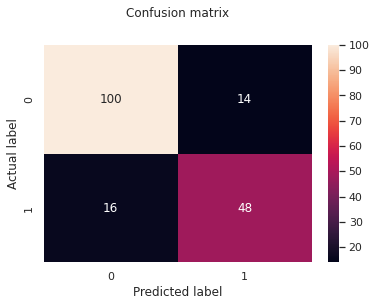

In [89]:
#Confusion Matrix in the form of Heatmap
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y,y_pred_gini)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')#,cmap="crest" )
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [90]:
#Classification Report with Gini Impurity
print("Report : ",classification_report(test_y,y_pred_gini))

Report :                precision    recall  f1-score   support

           0       0.86      0.88      0.87       114
           1       0.77      0.75      0.76        64

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



#### 2. Entropy D-Tree

In [91]:
# Predicton on test with Entropy
y_pred_ent = clf_ent.predict(test_x)

print('Predicted Values:',y_pred_ent)

Predicted Values: [0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0]


In [92]:
#Accuracy Score with Entropy
print("Accuracy : ",accuracy_score(test_y,y_pred_ent)*100)

Accuracy :  83.14606741573034


In [93]:
#Confusion Matrix with Entropy
print("Confusion Matrix: ",confusion_matrix(test_y,y_pred_ent))

Confusion Matrix:  [[103  11]
 [ 19  45]]


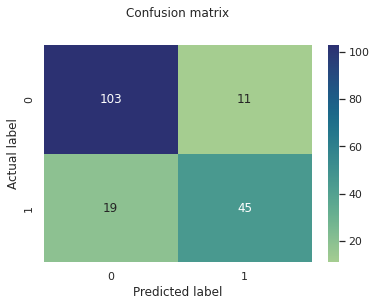

In [94]:
#Confusion Matrix in the form of Heatmap
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y,y_pred_ent)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g',cmap="crest" )
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [95]:
#Classification Report with Entropy
print("Report : ",classification_report(test_y,y_pred_ent))

Report :                precision    recall  f1-score   support

           0       0.84      0.90      0.87       114
           1       0.80      0.70      0.75        64

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.83      0.83      0.83       178



#### 3. Random Forest

In [96]:
# Predicton on test with Random Forest
y_pred_rfc = clf_rfc.predict(test_x)

print('Predicted Values:',y_pred_rfc)

Predicted Values: [0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0]


In [97]:
#Accuracy Score with Random Ferest
print("Accuracy : ",accuracy_score(test_y,y_pred_rfc)*100)

Accuracy :  80.33707865168539


In [98]:
#Confusion Matrix with Random Forest
print("Confusion Matrix: ",confusion_matrix(test_y,y_pred_rfc))

Confusion Matrix:  [[98 16]
 [19 45]]


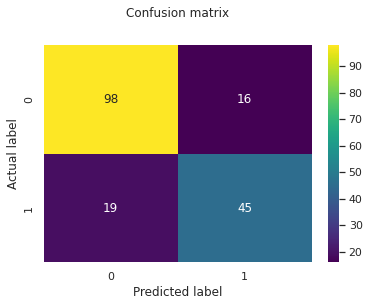

In [99]:
#Confusion Matrix in the form of Heatmap
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y,y_pred_rfc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g',cmap='viridis')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [100]:
#Classification Report with Random Forest
print("Report : ",classification_report(test_y,y_pred_rfc))

Report :                precision    recall  f1-score   support

           0       0.84      0.86      0.85       114
           1       0.74      0.70      0.72        64

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



## Improving the Model Accuracy with Random Search

In [101]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [102]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf_rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_x, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END bootstrap=True, max_depth=70

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=False, max_depth=5

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   3.8s
[CV] END bootstrap=True, max_depth=70, m

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.7s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   3.8s
[CV] END bootstrap=False, max_depth=1

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=200),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [103]:
#Best Parameters
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [104]:
#Training the Random Forest Again using best parameters
clf_rfc_best = RandomForestClassifier(n_estimators= 600,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features='sqrt',
 max_depth= 60,
 bootstrap= False)
clf_rfc_best.fit(train_x, train_y)

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_leaf=4, n_estimators=600)

In [105]:
# Predicton on test with best Random Forest
y_pred_rfc_best = clf_rfc_best.predict(test_x)

print('Predicted Values:',y_pred_rfc_best)

Predicted Values: [0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0]


In [106]:
#Accuracy Score with best Random Ferest
print("Accuracy : ",accuracy_score(test_y,y_pred_rfc_best)*100)

Accuracy :  84.26966292134831


In [107]:
#Confusion Matrix with best Random Forest
print("Confusion Matrix: ",confusion_matrix(test_y,y_pred_rfc_best))

Confusion Matrix:  [[102  12]
 [ 16  48]]


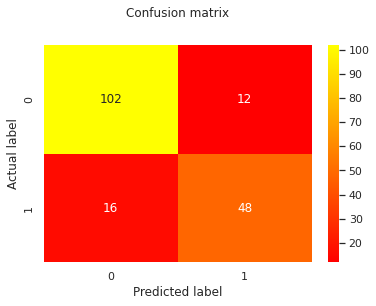

In [108]:
#Confusion Matrix in the form of Heatmap
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y,y_pred_rfc_best)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g',cmap='autumn')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [109]:
#Classification Report with Random Forest
print("Report : ",classification_report(test_y,y_pred_rfc_best))

Report :                precision    recall  f1-score   support

           0       0.86      0.89      0.88       114
           1       0.80      0.75      0.77        64

    accuracy                           0.84       178
   macro avg       0.83      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178



### The Accuracy Increased from 80.8% to 85.3% after using the Random Search